# Game Sales Analysis: Global Market Trends and Insights

In this project we will analyse patterns that can help us identify whether a particular game is successful or not in the video game market.

This pattern analysis may be based on several factors such as sales, popularity or even criticism.

With this it will be possible to have valuable perceptions to assist video game companies in making strategic decisions.

First we will load the libraries that will be necessary for our study and later we will load our data and analyse them.

# 1. Initiation

In [14]:
#Loading all the necessary libraries

import pandas as pdAndrew
import matplotlib.pyplot as plt
import numpy as  np
from scipy import stats as st
import seaborn as sns
import pandas as pd

# 1.1 Loading and exploring the data

In [15]:
#Loading the data
df = pd.read_csv('/Users/andrewferreira/Downloads/games.csv')
#df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv')

In [16]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In a first analysis we can see that our table contains missing data in several columns. Later on we will analyse more deeply and reflect on the best way to take care of this data.

The formatting of our index contains words starting with a capital letter, we will take care of this "problem" in the next cell.

In [18]:
#Formatting the name of the columns to lowercase
df.columns = df.columns.str.lower()

In [19]:
#Check if it worked
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 1.2 Checking and taking care of missing values

As mentioned earlier, our table contains several missing values. This topic will serve exactly to analyse and take care of these values.

In [20]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

There are then missing values in the column 'name', 'year_of_release','critic_score','user_score' and 'rating'.

Each of the cases will be a single case, so the replacement of values will require different methods for each of the columns.

- In the column 'name', as the values are almost null, we could have two options, either drop it or replace it with an unknown name. As I don't know if these values will be useful to me later, I will substitute both values for 'Unknown'

- In the 'year_of_release' column the total missing values is already higher, but as in name, we will choose to replace these values with 0. I don't think there's a need to do a drop.

- In the first instance in 'critic_score', I thought of replacing the null values with the mean or median, but reflecting a little more I came to the conclusion that it would not make sense because it would affect my study later. As each game is different, the criticism should not be based on the average or median of other games.

- A little like in 'critic_score', the 'user_score' column will also not change in the substitution of null values. Note that this column contains a 'TBD' value, that is, they are values that do not yet contain a note from the users. I will replace these values with null value and make a dropna so as not to affect future analyses.

- There is a very large relationship between the 'rating' column and the 'genre' column. I will create a function that relates data from these two columns to make a substitution of the null values in the 'rating' column. Possibly there will be some change in classification in some games but these values will be minimal and in such a large database will not influence our study much.

In [21]:
df['name'].isna().sum()

2

In [22]:
#Replacing values in 'name'
df['name'] = df['name'].fillna('Unknown')

In [23]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [24]:
df['year_of_release'].isna().sum()

269

In [25]:
#susbtituting missing values in 'year_of_release'
df['year_of_release'] = df['year_of_release'].fillna(0)

In [26]:
df['year_of_release'].isna().sum()

0

In [27]:
#Checking missing values in 'critic_score
df['critic_score'].isna().sum()

8578

In [28]:
df['user_score'].isna().sum()

6701

In [29]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [30]:
#substituting values 'tbd' for 'nan'
df['user_score'].replace({'tbd':np.nan}, inplace=True)

In [31]:
df['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [32]:
df = df.dropna(subset=['user_score'])
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E


In [33]:
df['genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [34]:
#Function that substitutes the missing values in 'genre'
def mudar_credit(row):
    genero = row['genre']
    classificacao = row['rating']
    
    dicionario = ['Platform', 'Sports', 'Misc', 'Racing', 'Simulation', 'Puzzle']
    
    if genero in dicionario:
        return 'E'
    elif genero in ['Role-Playing', 'Fighting', 'Strategy']:
        return 'T'
    elif genero in ['Action', 'Shooter', 'Adventure']:
        return 'M'
    else:
        return classificacao
        

In [35]:
#checking if it works
mudar_credit(df.iloc[3])

'E'

In [36]:
#substitute missing values
df['rating'] = df.apply(mudar_credit, axis=1)

In [37]:
df['rating'].isna().sum()

0

In [38]:
df.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       573
user_score           0
rating               0
dtype: int64

# 1.3 Data correction

In this topic we will replace some types of data that seem to be relevant. The year_of_release column presents a float data type, while the user_score column presents object data types. As it does not make sense to have years with decimals, we will replace this column with an integer. As user_score contains decimal values will be changed to float type.

In [39]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['year_of_release'] 

0        2006
2        2008
3        2009
6        2006
7        2006
         ... 
16681    1997
16692    2014
16696    2011
16702    2011
16705    2009
Name: year_of_release, Length: 7590, dtype: int64

In [40]:
df['user_score'] = df['user_score'].astype(float)
df['user_score']

0        8.0
2        8.3
3        8.0
6        8.5
7        6.6
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 7590, dtype: float64

# 1.4 Total sum of regions (data enrichment)

We will create a 'total_sales' column that will give us the result of the sum of the sales of each game in the three regions under analysis.

In [41]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [42]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


# 2. Data analysis

On this topic we will check

- How many games were played in different years and whether the data for each period are significant.

- We will check how sales varied on different platforms and then check the distribution of sales of the platforms with the highest value in sales.

- We will slice data in a year's choice and then check which platforms lead sales as well as check through a boxplot the overall value of sales per platform.

- Check how user ratings affect sales of a popular platform

- Compare the sale of games on different platforms

- Check which genres are most profitable

# 2.1 Number of games relaunched each year 

In [43]:
#Code that allows us to delete the values of year 0
df = df[df['year_of_release'] != 0]

In [44]:
df_grouped = df.groupby('year_of_release').mean()

In [45]:
contagem_jogos = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc='count')
contagem_jogos = contagem_jogos.reset_index()
contagem_jogos

,year_of_release,name
0,1985,1
1,1988,1
2,1992,1
3,1994,1
4,1996,8
5,1997,18
6,1998,31
7,1999,31
8,2000,107
9,2001,257


In the 80s and 90s still in the first generations of video games the total of games was not very significant until very close to the end of the 90s where more platforms began to be relaund, which consequently meant that there were more games.

We can conclude that with some exceptions there was an exponential growth in the number of games from the beginning of the 2000s until the year 2008, where it reached its peak. While it is curious that from that same year there was a sharp decline. This decline may be due to the change of game technologies or even the cost of development. However, we cannot draw specific conclusions about why there was this decline.

# 2.2 Sales variation on each platform

In [46]:
#Check the number of sales per platform
plataforma_jogos = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc='sum')
plataforma_jogos = plataforma_jogos.reset_index().sort_values(by='total_sales', ascending=False)

plataforma_jogos

,platform,total_sales
7,PS2,983.01
14,X360,888.89
8,PS3,829.17
12,Wii,696.02
2,DS,413.30
9,PS4,244.92
6,PS,214.45
15,XB,212.95
5,PC,202.92
10,PSP,195.61


Based on total platform sales we can say that Playsation 2, Xbox 360 and Playstation 3 led the ranking of sales, were the most popular among users or that they had a great impact on the gaming industry. On the opposite side to WiiU, PSV and DC were the platforms that were less sold.

It should be noted that PC despite not being a console, continues to have a signalling sales value comparing with other platforms.

Next we will 'paste' on the three most popular platforms and analyse the total number of game sales per year.

In [47]:
platform_PS2 = df.query('platform in "PS2"')
platform_PS2.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
84,Final Fantasy X,PS2,2001,Role-Playing,2.91,2.07,2.73,0.33,92.0,8.7,T,8.04
102,Need for Speed Underground,PS2,2003,Racing,3.27,2.83,0.08,1.02,85.0,8.6,E,7.20
113,Need for Speed Underground 2,PS2,2004,Racing,2.71,3.02,0.08,1.09,82.0,8.6,E,6.90
114,Medal of Honor: Frontline,PS2,2002,Shooter,2.93,2.75,0.17,0.99,88.0,8.5,M,6.84
132,Kingdom Hearts,PS2,2002,Role-Playing,3.64,1.20,1.49,0.07,85.0,8.8,T,6.40


In [48]:
ps2 = platform_PS2.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc='count')
ps2 = ps2.reset_index().sort_values(by='total_sales', ascending=False)
ps2

,year_of_release,total_sales
4,2004,205
5,2005,191
2,2002,185
3,2003,185
1,2001,132
6,2006,119
7,2007,70
8,2008,54
0,2000,40
9,2009,30


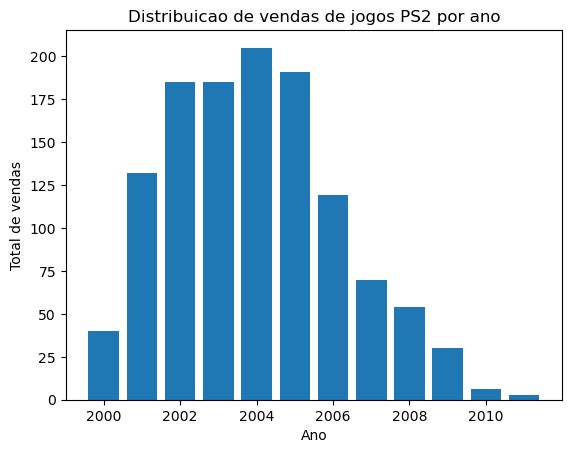

In [49]:
plt.bar(ps2['year_of_release'], ps2['total_sales'])
plt.title('Distribuicao de vendas de jogos PS2 por ano')
plt.xlabel('Ano')
plt.ylabel('Total de vendas')
plt.show()

In [50]:
platform_x360 = df.query('platform in "X360"')
platform_x360.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.47
44,Halo 3,X360,2007,Shooter,7.97,2.81,0.13,1.21,94.0,7.8,M,12.12
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
64,Halo: Reach,X360,2010,Shooter,7.04,1.95,0.08,0.79,91.0,7.9,M,9.86


In [51]:
x360 = platform_x360.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc='count')
x360 = x360.reset_index().sort_values(by='total_sales', ascending=False)
x360

,year_of_release,total_sales
4,2009,131
5,2010,131
6,2011,129
3,2008,122
2,2007,105
7,2012,92
1,2006,76
8,2013,60
9,2014,52
10,2015,24


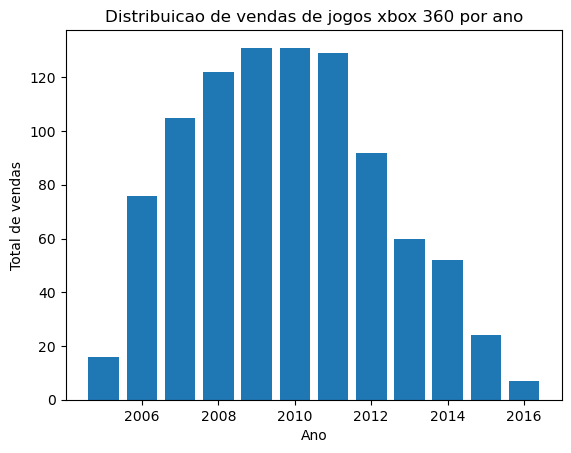

In [52]:
plt.bar(x360['year_of_release'], x360['total_sales'])
plt.title('Distribuicao de vendas de jogos xbox 360 por ano')
plt.xlabel('Ano')
plt.ylabel('Total de vendas')
plt.show()

In [53]:
platform_ps3 = df.query('platform in "PS3"')
platform_ps3.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
55,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M,10.61
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,M,8.17
104,Battlefield 3,PS3,2011,Shooter,2.85,2.89,0.35,1.08,85.0,7.5,M,7.17


In [54]:
ps3 = platform_ps3.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc='count')
ps3 = ps3.reset_index().sort_values(by='total_sales', ascending=False)
ps3

,year_of_release,total_sales
5,2011,134
4,2010,122
3,2009,116
2,2008,111
6,2012,97
7,2013,88
1,2007,76
8,2014,63
9,2015,26
0,2006,19


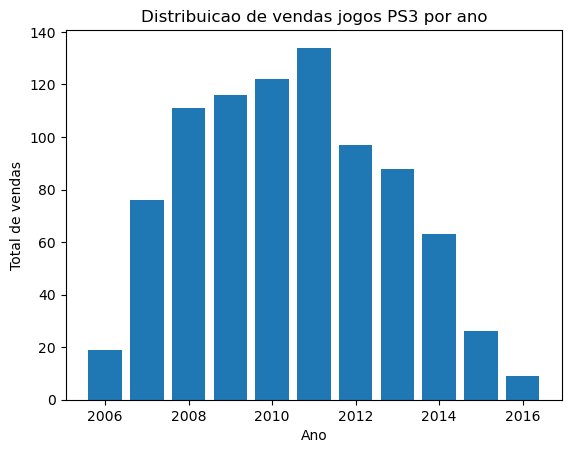

In [55]:
plt.bar(ps3['year_of_release'], ps3['total_sales'])
plt.title('Distribuicao de vendas jogos PS3 por ano')
plt.xlabel('Ano')
plt.ylabel('Total de vendas')
plt.show()

Analysing the sales of the three chosen platforms we find that they all have a level of popularity on the rise up to about half of the period under study and after tha their sales fall to peak. It may be because a new platform is launched on the market, a good example of this is explicit in the PS2 and PS3 data, both are from the same company and the period of greatest decline in PS2 sales begins when the launch and ascension of PS3 occurs.

# 2.3 Collect data from a certain period

I chose to choose the data from 2014 to 2016 to study.

In [56]:
#Determine the period
periodo_dados = df.loc[df['year_of_release'] >= 2014]
periodo_dados.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,T,7.17


# 2.4 Total sales by platform

In [57]:
#Check the total sales of platforms
plataforma_vendas = periodo_dados.groupby('platform')['total_sales'].sum().reset_index()
plataforma_vendas = plataforma_vendas.sort_values(by='total_sales', ascending=False)
plataforma_vendas

,platform,total_sales
3,PS4,219.85
8,XOne,115.74
2,PS3,48.69
7,X360,40.84
6,WiiU,34.65
0,3DS,26.89
1,PC,24.08
4,PSV,10.80
5,Wii,2.57


Text(0, 0.5, 'Vendas ')

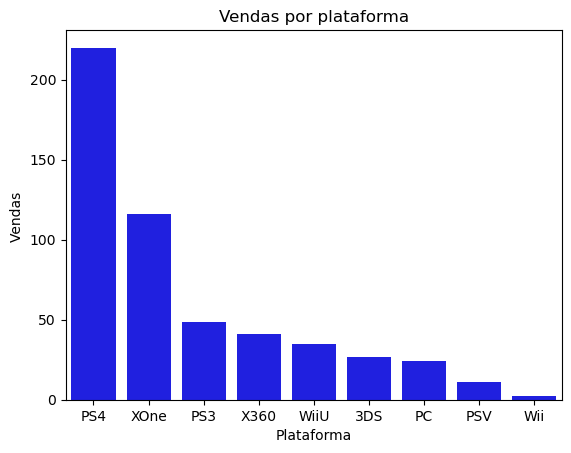

In [58]:
sns.barplot(data=plataforma_vendas, x='platform', y='total_sales', color='blue')
plt.title('Vendas por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas ')

Through our bar chart we can check which platforms are sales leaders.

That said, we will select the three potentially most profitable

In [59]:
plat_ps4 = 'PS4'
df_plataforma = periodo_dados[periodo_dados['platform'] == plat_ps4]
vendas_ps4 = df_plataforma.groupby('year_of_release')['total_sales'].sum().reset_index()
vendas_ps4

,year_of_release,total_sales
0,2014,80.95
1,2015,81.16
2,2016,57.74


In [60]:
plat_xone = 'XOne'
df_plataformax = periodo_dados[periodo_dados['platform'] == plat_xone]
plat_xone = df_plataformax.groupby('year_of_release')['total_sales'].sum().reset_index()
plat_xone

,year_of_release,total_sales
0,2014,47.09
1,2015,44.83
2,2016,23.82


In [61]:
plat_ps3 = 'PS3'
df_plataformaps3 = periodo_dados[periodo_dados['platform'] == plat_ps3]
plat_ps3 = df_plataformaps3.groupby('year_of_release')['total_sales'].sum().reset_index()
plat_ps3

,year_of_release,total_sales
0,2014,35.97
1,2015,11.09
2,2016,1.63


The three leading sales platforms are in decline but with different values and contexts. We can mention that PS4 began its decline only in 2016 but with a large number of sales while x One and PS3 started a year before their decline. It should be noted that PS3 lost a lot of popularity in 2016.

# 2.5 Global game sales divided by platform

Next I will create a boxplot that will contain the global sale of all games per platform in order to observe if the differences in sales are significant.

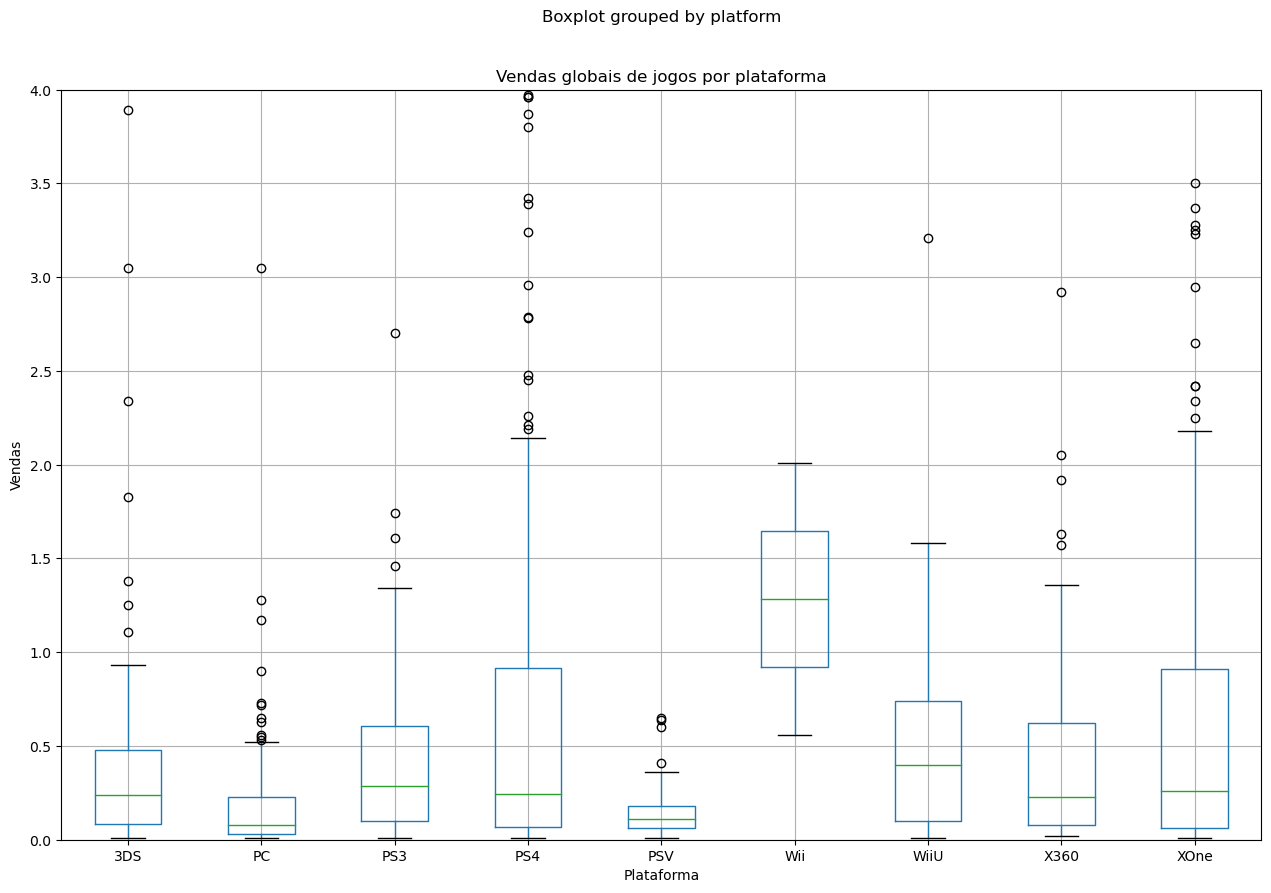

In [62]:
periodo_dados.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.ylim(0,4)
plt.title('Vendas globais de jogos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas')
plt.show()

The differences are significant in the total number of sales because the medians are different and the moustaches are different.

We will analyse whether the average sales on several platforms are significant, for this we will group the platform data and total sales by calculating its average.

In [63]:
media_vendas = periodo_dados.groupby('platform')['total_sales'].mean()
media_vendas = media_vendas.sort_values(ascending=False)
media_vendas

platform
Wii     1.285000
PS4     0.908471
WiiU    0.721875
XOne    0.701455
PS3     0.496837
X360    0.492048
3DS     0.488909
PC      0.197377
PSV     0.147945
Name: total_sales, dtype: float64

In the analysis of average sales, the Wii platform leads the ranking with a total of 1.28 units per game, thus obtaining the highest average, followed by PS4 with a total of 0.90 units per game. The platform with the fewest game units sold and PSV with a total of 0.14.

# 2.6 Dispersing graphs

We will now check how user evaluations affect the sales of a popular platform. In my case, I will opt for the PS4 platform.

In this same topic we will compare the sales of some games sold on PS4 with other platforms.

In [64]:
ps4 = periodo_dados.query('platform in "PS4"')
ps4.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,T,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,M,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,M,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,M,4.62
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

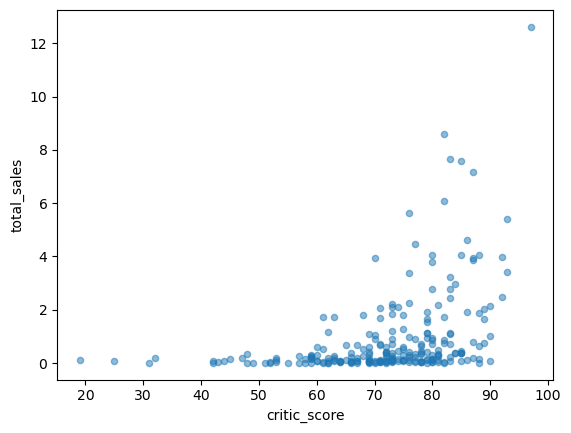

In [65]:
ps4.plot.scatter(y='total_sales',x='critic_score', alpha=0.5)

In [66]:
critic_corr = ps4['critic_score'].corr(ps4['total_sales'])
critic_corr

0.40190287811475334

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

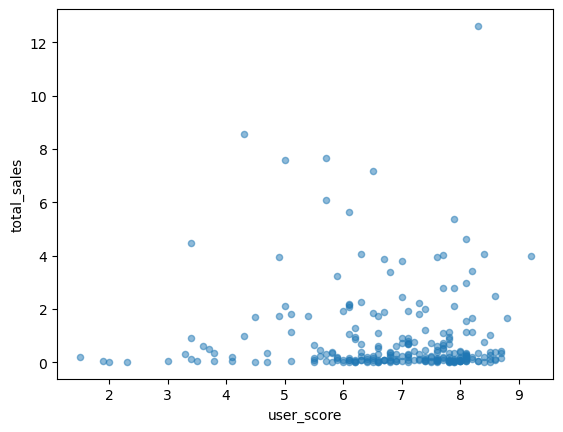

In [67]:
ps4.plot.scatter(y='total_sales',x='user_score', alpha=.5)

In [68]:
user_corr = ps4['user_score'].corr(ps4['total_sales'])
user_corr

-0.040131589472697356

Through the correlation charts we can verify that the column 'critic_score' is positive, that means that the evaluation is very good for the sales. The opposite goes into user_score where the correlation is negative which causes the evaluations to have a negative impact on 'total sales'.

We will now analyse the total of sales of some games on PS4 with the same games but on other platforms.

In [69]:
plat_games = periodo_dados.pivot_table(index=['name', 'platform'], values= 'total_sales', aggfunc='sum')
plat_games = plat_games.reset_index()
plat_games.head(30)

,name,platform,total_sales
0,2014 FIFA World Cup Brazil,PS3,0.61
1,2014 FIFA World Cup Brazil,X360,0.43
2,7 Days to Die,PS4,0.14
3,7 Days to Die,XOne,0.05
4,7th Dragon III Code: VFD,3DS,0.16
5,Act of Aggression,PC,0.01
6,Adventure Time: The Secret of the Nameless Kin...,3DS,0.07
7,Adventure Time: The Secret of the Nameless Kin...,X360,0.05
8,Aegis of Earth: Protonovus Assault,PS4,0.02
9,Aegis of Earth: Protonovus Assault,PSV,0.03


Through our table we can see that, except for some exceptions, there is a greater tendency in the sale of the same game on the PS4 platform than on other platforms.

# 2.7 General distribution of games by gender

At this point we will check which genre is more profitable.

In [70]:
dist_jogos = periodo_dados.groupby('genre')['total_sales'].sum()
dist_jogos = dist_jogos.sort_values(ascending=False)
dist_jogos

genre
Action          146.15
Shooter         129.85
Sports          107.10
Role-Playing     51.59
Racing           23.10
Misc             16.00
Platform         15.74
Fighting         13.59
Simulation        9.84
Adventure         7.20
Strategy          2.67
Puzzle            1.28
Name: total_sales, dtype: float64

Through our study we're able to verify that the most profitable genre is Action with a total of sales of 146.15, followed by shooter with a total of 129.85. To complete the podium, the Sports genre verifies a total sales of 107.10. The adventure, strategy and puzzle genres are the least profitable with a total sales of 7.2, 2.67 and 1.28 respectively. It should be noted that profit has nothing to do with popularity, this profit may be due to other factors such as the price per game or even the preference of each user.

# 3. Preferences by region

In this paragraph we will address the sales preferences for each region. We will describe the 5 main platforms in each region as well as the five best-selling genres in each region. We will also check if ESRB ratings affect sales in individual regions.

NORTH AMERICA Region

In [71]:
na_quotas= periodo_dados.groupby('platform')['na_sales'].sum()
na_quotas = na_quotas.sort_values(ascending=False)
na_quotas

platform
PS4     74.99
XOne    66.98
X360    24.00
PS3     16.99
WiiU    15.29
3DS      8.91
PC       6.92
PSV      1.97
Wii      1.14
Name: na_sales, dtype: float64

In [72]:
na_genero= periodo_dados.groupby('genre')['na_sales'].sum()
na_genero = na_genero.sort_values(ascending=False)
na_genero

genre
Shooter         60.18
Action          58.25
Sports          45.95
Role-Playing    19.16
Misc             8.02
Racing           7.74
Fighting         5.99
Platform         5.97
Adventure        2.74
Simulation       1.84
Strategy         0.82
Puzzle           0.53
Name: na_sales, dtype: float64

In [73]:
na_rating= periodo_dados.groupby('rating')['na_sales'].sum()
na_rating = na_rating.sort_values(ascending=False)
na_rating

rating
M    121.17
E     70.05
T     25.97
Name: na_sales, dtype: float64

EUROPEAN Region

In [74]:
eu_quotas= periodo_dados.groupby('platform')['eu_sales'].sum()
eu_quotas = eu_quotas.sort_values(ascending=False)
eu_quotas

platform
PS4     102.03
XOne     38.18
PS3      19.55
PC       15.47
X360     13.07
WiiU     11.04
3DS       6.53
PSV       2.52
Wii       1.22
Name: eu_sales, dtype: float64

In [75]:
eu_genero= periodo_dados.groupby('genre')['eu_sales'].sum()
eu_genero = eu_genero.sort_values(ascending=False)
eu_genero

genre
Action          60.86
Shooter         49.52
Sports          45.16
Role-Playing    17.20
Racing          11.53
Platform         5.73
Simulation       5.55
Misc             4.97
Fighting         3.89
Adventure        3.20
Strategy         1.60
Puzzle           0.40
Name: eu_sales, dtype: float64

In [76]:
eu_rating= periodo_dados.groupby('rating')['eu_sales'].sum()
eu_rating = eu_rating.sort_values(ascending=False)
eu_rating

rating
M    113.58
E     73.34
T     22.69
Name: eu_sales, dtype: float64

JAPAN

In [77]:
jp_quotas= periodo_dados.groupby('platform')['jp_sales'].sum()
jp_quotas = jp_quotas.sort_values(ascending=False)
jp_quotas

platform
3DS     10.03
PS4      8.51
WiiU     5.78
PS3      4.96
PSV      4.95
XOne     0.27
X360     0.07
PC       0.00
Wii      0.00
Name: jp_sales, dtype: float64

In [78]:
jp_genero= periodo_dados.groupby('genre')['jp_sales'].sum()
jp_genero = jp_genero.sort_values(ascending=False)
jp_genero

genre
Role-Playing    9.93
Action          8.80
Shooter         4.17
Platform        2.55
Fighting        2.03
Simulation      1.83
Sports          1.73
Racing          1.50
Misc            1.39
Adventure       0.35
Puzzle          0.26
Strategy        0.03
Name: jp_sales, dtype: float64

In [79]:
jp_rating= periodo_dados.groupby('rating')['jp_sales'].sum()
jp_rating = jp_rating.sort_values(ascending=False)
jp_rating

rating
M    13.32
T    11.99
E     9.26
Name: jp_sales, dtype: float64

Through our study we can conclude that:

- The most popular platforms in North America are: PS4, XOne, X360, PS3 and Wiiu.
- The most popular platforms in Europe are: PS4, XOne, PS3, PC and X360.
- The most popular platforms in Japan are: 3DS, PS4, Wiiu, PS3 and PSV.

The two most popular platforms in North America and Europe are the same, PS4 and XOne, the same does not happen in Japan where the most popular platform is 3DS followed by PS4.

- The most popular genres in North America are: Shooter, Action, Sports, Role-Playing and Misc.
- The most popular genres in Europe are: Action, Shooter, Sports, Role-Playing and Racing.
- The most popular genres in Japan are: Role-Playing, Action, Shooter, Platform and Fighting.

We can also verify that ESRB ratings affect sales in each region. North America and Europe verify the most popular genus M followed by gender E and T. In Japan there is a change in relation to North America and Japan. The M rating remains the most popular among users with only a change of preference between E and T. In the case of Japan there is a greater preference of T over E.

# 4. Testing hypotheses

In this chapter we will test some hypotheses.

First, we will test the hypothesis on the average ratings of users of Xbox One and PC platforms:

- Hypothesis null: The average ratings of users of Xbox One and PC platforms are the same.

- Alternative hypothesis: The average ratings of users of Xbox One and PC platforms are different.

In [80]:
alpha = 0.05
sample_1 = periodo_dados[periodo_dados['platform'].str.contains('XOne')]
sample_2 = periodo_dados[periodo_dados['platform'].str.contains('PC')]
results = st.ttest_ind(sample_1['user_score'], sample_2['user_score'], equal_var=False, nan_policy='omit')


if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")
    
print('p-value:', results.pvalue)

We cannot reject the null hypothesis
p-value: 0.11601398086668832


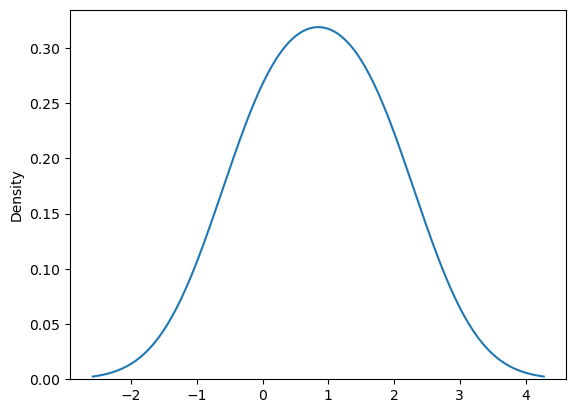

In [81]:
sns.kdeplot(results);

The first hypothesis tested tells us that we cannot reject the null hypothesis, that is, there is no significant difference between the averages of users of the Xbox One and PC platforms.

The second hypothesis to be tested will be about the average user ratings for the Sports and Action genres are the same.

- Nil hypothesis : The average ratings for the Action and Sports genres are the same.

- Alternative hypothesis : The average ratings for the Action and Sports genres are different.

In [82]:
alpha = 0.05
sample_1 = periodo_dados[periodo_dados['genre'].str.contains('Action')]
sample_2 = periodo_dados[periodo_dados['genre'].str.contains('Sports')]
results = st.ttest_ind(sample_1['user_score'], sample_2['user_score'], equal_var=False, nan_policy='omit')


if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")
    
print('p-value:', results.pvalue)

We reject the null hypothesis
p-value: 1.1825550382644557e-14


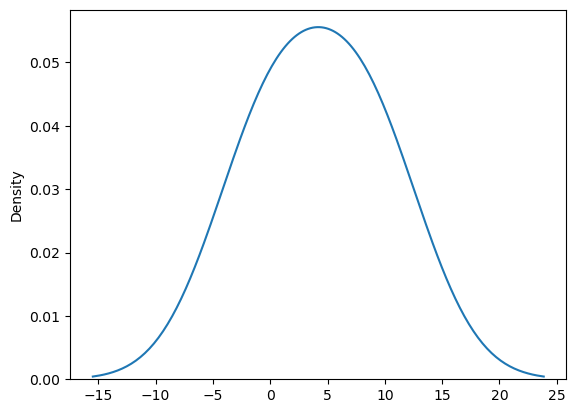

In [83]:
sns.kdeplot(results);

In this second test, we reject the null hypothesis, that is, there is a significant difference between the average ratings of users for the genres that were tested, thus being different.

# 5. Conclusion 

In this study we had the goal of identifying patterns that determine whether a game is successful or not.

- Having said that, I started by loading the data on the table provided and analysing some types of data and if there were some missing values. In a first analysis I was able to verify that our table contained missing data in several columns, which made it necessary to make some substitution in these values. The columns 'name', 'year_of_release','critic_score','user_score' and 'rating' needed this replacement.

- After all the processes in replacing the missing values I found it necessary to adjust the data type in two columns. The column 'year_of_release' presented data of type float and 'critic_score' object values, I thought it would make more sense to replace for integer and float type respectively. With these measures, he concludes that he could perform a more precise and detailed analysis of the data.

- After all the data replaced I was able to start my analysis through various processes. I started by analysing the number of games per year, and then I could conclude that the 80 and 90 generations were little significant in numbers of games, so there was an exponential growth from 2000 to 2008 where the peak of sales was reached, and then there was a gradual reduction over the years. As I mentioned in this part of the study, this decline could be due to the change in game technologies or even the costs of their development. However, we cannot draw specific conclusions about why there was this decline.

- I identified the 3 most popular platforms in terms of sales and found that all of them had a level of popularity on the rise up to about half of the first period of time under study, which did not happen in this second part. One of the possibilities could be the fact that new platforms are launched on the market, which would affect sales of older versions.

- I made a data collection for a certain period so I can check the total sales per platform. The top 3 leaders were PS4, Xbox xOne and PS3. I found that sales of all platforms are declining, hoping that the sales of these 3 platforms continue to decline.

- I checked the global sale of games divided by platform through a boxplot. The differences are significant in the total number of sales because the medians are different and the moustaches are different. As for average sales, the Wii platform obtained the highest average while PSV was the platform with the least game units sold.

- Correlation graphics were useful to check if there would be a significant influence on the actions of users and professionals in the sales of a popular platform (PS4 was chosen). I could verify that in the case of critic_score the correlation was positive, which positively influenced the sale while the opposite occurred in user_score. It is important to consider that the correlation does not imply causality. That is, a high rating of criticism or user may be associated with higher sales, but does not necessarily cause higher sales.

- In the general distribution of games by genre, see that the most profitable genres were Action, Shooter and Sports and that the least profitable were the Puzzle, Adventure and Strategy genres.

- I analysed user preferences by region and concluded that there are similarities in platform sales of all regions such as in the ESRB game genre and classifications.

- Finally I did some hypothesis tests. One of them was to test the hypothesis about the average ratings of users of Xbox One and PC platforms, the other was to check if the average ratings for the Action and Sports genres were different. In the first test the result was that the average ratings of users of Xbox One and PC platforms are the same. In the second case there is a significant difference between the average ratings of users for the genres that have been tested being thus different.

To top it off we can then say that PS4 despite being in a sales decline continues to lead, being the most popular platform, which makes it the most viable platform to bet on marketing campaigns. The Action, Sports, Shooting and Role-Playing genres are also the most profitable.